# NBA Shooting Heatmaps

## Import Neccesary Modules

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request

import matplotlib.pyplot as plt
from matplotlib import patches, gridspec
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.lines import Line2D
from matplotlib.offsetbox import  OffsetImage

import scipy
from scipy import stats
from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings('ignore')

## Import NBA shot log data snd display all columns

In [277]:
shot = pd.read_csv("NBA Shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


In [278]:
shot

self_previous_shot player_position home_game  location_x  \
0                     NaN              SF       Yes        97.0   
1                  MISSED               C       Yes        52.0   
2                  SCORED              SG       Yes       239.0   
3                  SCORED              PG       Yes       102.0   
4                  SCORED              PF       Yes       128.0   
...                   ...             ...       ...         ...   
210067             SCORED               F        No        58.0   
210068             SCORED               F        No        52.0   
210069             SCORED               F        No       171.0   
210070             MISSED              PF        No       285.0   
210071             MISSED              PG        No       195.0   

       opponent_previous_shot home_team             shot_type  points  \
0                      SCORED       ATL      Pullup Jump Shot       2   
1                      SCORED       ATL         Tip Dunk Shot       2   
2                      MISSED       ATL             Jump Shot       2   
3                      SCORED       ATL      Pullup Jump Shot       2   
4                      MISSED       ATL  Turnaround Jump Shot       2   
...                       ...       ...                   ...     ...   
210067                 MISSED       MIA             Jump Shot       2   
210068                 SCORED       MIA                  Dunk       2   
210069                 SCORED       MIA             Jump Shot       2   
210070                 SCORED       MIA             Jump Shot       3   
210071                 MISSED       MIA             Jump Shot       3   

       away_team  location_y   time        date      shoot_player  \
0            WAS       405.0   1:09  10/27/2016     Kent Bazemore   
1            WAS       250.0   1:11  10/27/2016     Dwight Howard   
2            WAS       223.0   1:41  10/27/2016       Kyle Korver   
3            WAS       385.0   2:16  10/27/2016   Dennis Schroder   
4            WAS       265.0   2:40  10/27/2016      Paul Millsap   
...          ...         ...    ...         ...               ...   
210067       WAS       153.0   8:18   4/12/2017     Daniel Ochefu   
210068       WAS       250.0   8:51   4/12/2017     Daniel Ochefu   
210069       WAS       149.0   9:20   4/12/2017     Daniel Ochefu   
210070       WAS       334.0  10:33   4/12/2017  Chris McCullough   
210071       WAS       455.0  11:50   4/12/2017        Trey Burke   

        time_from_last_shot  quarter current_shot_outcome  
0                       NaN        1               MISSED  
1                       2.0        1               SCORED  
2                      30.0        1               SCORED  
3                      35.0        1               SCORED  
4                      24.0        1               MISSED  
...                     ...      ...                  ...  
210067                 39.0        4               SCORED  
210068                 33.0        4               SCORED  
210069                 29.0        4               MISSED  
210070                 73.0        4               MISSED  
210071                 77.0        4               SCORED  

[210072 rows x 16 columns]

## Descriptive Statistics for shot log data

In [279]:
shot.describe()

location_x         points    location_y  time_from_last_shot  \
count  209675.000000  210072.000000  209675.00000        200072.000000   
mean      468.524507       2.316130     249.44723            33.279489   
std       345.063654       0.464965     111.02320            19.797357   
min         0.000000       2.000000       0.00000             0.000000   
25%        94.000000       2.000000     197.00000            22.000000   
50%       342.000000       2.000000     250.00000            31.000000   
75%       843.000000       3.000000     303.00000            41.000000   
max       933.000000       3.000000     500.00000           255.000000   

             quarter  
count  210072.000000  
mean        2.480383  
std         1.136841  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         3.000000  
max         8.000000

## Plot all the shots taken throughout the season

Text(0.5, 1.0, 'All shots for 16-17 NBA season')

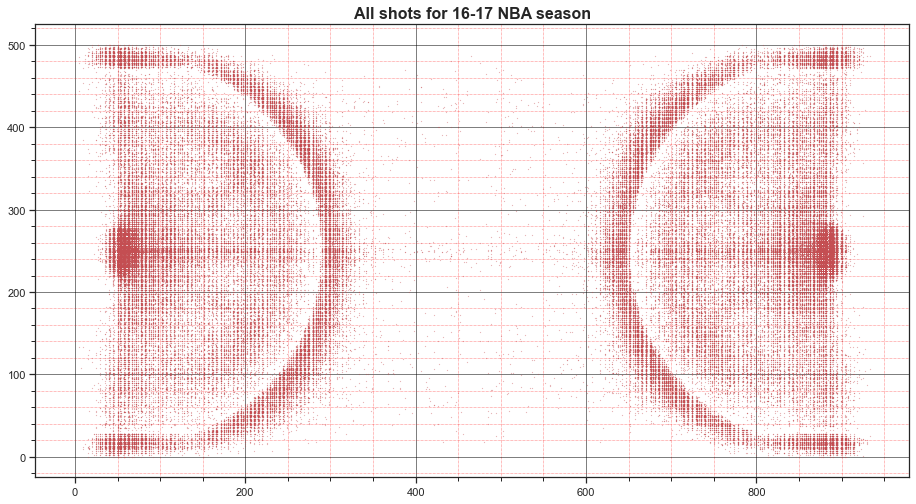

In [280]:
x = shot['location_x']
y = shot['location_y']

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("All shots for 16-17 NBA season", fontsize = 16, fontweight='bold')

## Plot all the shots to one half of the court

In [281]:
shot['halfcourt_y'] =np.where(shot['location_x'] > 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_x'] =np.where(shot['location_x'] > 933/2, 500 - shot['location_y'],shot['location_y'])
shot['halfcourt_x'] = shot['halfcourt_x'] 
shot.describe()

location_x         points    location_y  time_from_last_shot  \
count  209675.000000  210072.000000  209675.00000        200072.000000   
mean      468.524507       2.316130     249.44723            33.279489   
std       345.063654       0.464965     111.02320            19.797357   
min         0.000000       2.000000       0.00000             0.000000   
25%        94.000000       2.000000     197.00000            22.000000   
50%       342.000000       2.000000     250.00000            31.000000   
75%       843.000000       3.000000     303.00000            41.000000   
max       933.000000       3.000000     500.00000           255.000000   

             quarter    halfcourt_y    halfcourt_x  
count  210072.000000  209675.000000  209675.000000  
mean        2.480383     133.268520     249.696053  
std         1.136841      89.606222     111.024160  
min         1.000000       0.000000       0.000000  
25%         1.000000      55.000000     197.000000  
50%         2.000000      92.000000     250.000000  
75%         3.000000     213.000000     303.000000  
max         8.000000     465.000000     500.000000

Text(0.5, 1.0, 'All shots for 16-17 NBA season')

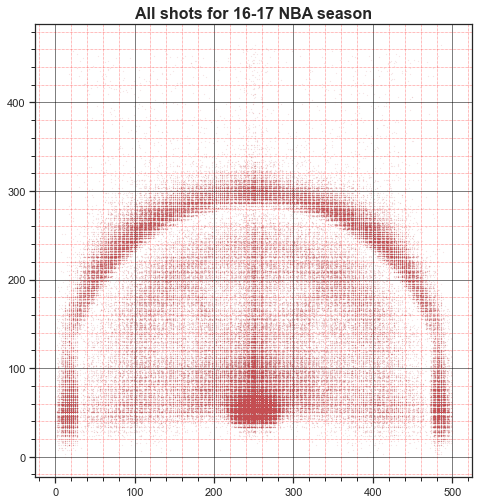

In [282]:
plt.figure(figsize=(94/12,50/6))
plt.scatter(shot['halfcourt_x'],shot['halfcourt_y'], s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("All shots for 16-17 NBA season", fontsize = 16, fontweight='bold')

In [283]:
shot

self_previous_shot player_position home_game  location_x  \
0                     NaN              SF       Yes        97.0   
1                  MISSED               C       Yes        52.0   
2                  SCORED              SG       Yes       239.0   
3                  SCORED              PG       Yes       102.0   
4                  SCORED              PF       Yes       128.0   
...                   ...             ...       ...         ...   
210067             SCORED               F        No        58.0   
210068             SCORED               F        No        52.0   
210069             SCORED               F        No       171.0   
210070             MISSED              PF        No       285.0   
210071             MISSED              PG        No       195.0   

       opponent_previous_shot home_team             shot_type  points  \
0                      SCORED       ATL      Pullup Jump Shot       2   
1                      SCORED       ATL         Tip Dunk Shot       2   
2                      MISSED       ATL             Jump Shot       2   
3                      SCORED       ATL      Pullup Jump Shot       2   
4                      MISSED       ATL  Turnaround Jump Shot       2   
...                       ...       ...                   ...     ...   
210067                 MISSED       MIA             Jump Shot       2   
210068                 SCORED       MIA                  Dunk       2   
210069                 SCORED       MIA             Jump Shot       2   
210070                 SCORED       MIA             Jump Shot       3   
210071                 MISSED       MIA             Jump Shot       3   

       away_team  location_y   time        date      shoot_player  \
0            WAS       405.0   1:09  10/27/2016     Kent Bazemore   
1            WAS       250.0   1:11  10/27/2016     Dwight Howard   
2            WAS       223.0   1:41  10/27/2016       Kyle Korver   
3            WAS       385.0   2:16  10/27/2016   Dennis Schroder   
4            WAS       265.0   2:40  10/27/2016      Paul Millsap   
...          ...         ...    ...         ...               ...   
210067       WAS       153.0   8:18   4/12/2017     Daniel Ochefu   
210068       WAS       250.0   8:51   4/12/2017     Daniel Ochefu   
210069       WAS       149.0   9:20   4/12/2017     Daniel Ochefu   
210070       WAS       334.0  10:33   4/12/2017  Chris McCullough   
210071       WAS       455.0  11:50   4/12/2017        Trey Burke   

        time_from_last_shot  quarter current_shot_outcome  halfcourt_y  \
0                       NaN        1               MISSED         97.0   
1                       2.0        1               SCORED         52.0   
2                      30.0        1               SCORED        239.0   
3                      35.0        1               SCORED        102.0   
4                      24.0        1               MISSED        128.0   
...                     ...      ...                  ...          ...   
210067                 39.0        4               SCORED         58.0   
210068                 33.0        4               SCORED         52.0   
210069                 29.0        4               MISSED        171.0   
210070                 73.0        4               MISSED        285.0   
210071                 77.0        4               SCORED        195.0   

        halfcourt_x  
0             405.0  
1             250.0  
2             223.0  
3             385.0  
4             265.0  
...             ...  
210067        153.0  
210068        250.0  
210069        149.0  
210070        334.0  
210071        455.0  

[210072 rows x 18 columns]

## Define a function to draw the court lines

In [284]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False, analysis_lines=False):

    if ax is None:
        ax = plt.gca()

    hoop = Circle((250,55), radius=7.5, linewidth=lw, color=color, fill=False)

    backboard = Rectangle((220, 42), 60, -1, linewidth=3, color=color)

    # The paint
    outer_box = Rectangle((170, 0), 160, 190, linewidth=lw, color=color,fill=False)
    inner_box = Rectangle((190, 0), 120, 190, linewidth=lw, color=color,fill=False)

    top_free_throw = Arc((250, 190), 120, 120, theta1=0, theta2=180,linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((250, 190), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((250, 47.5), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    corner_three_a = Rectangle((30, 0), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((470, 0), 0, 140, linewidth=lw, color=color)

    three_arc = Arc((250, 47.5), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)


    center_outer_arc = Arc((250, 470), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((250, 470), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((0, 0), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)
        
    if analysis_lines:
        # y axis line intersecting middle of hoop
        line1 = Line2D([0, 500], [55, 55], linestyle = '--', linewidth = 1, color = color, zorder = 1)
        # y axis line intersecting backboard
        line2 = Line2D([0, 500], [40, 40], linestyle = '--', linewidth = 1, color = color, zorder = 1)
        
        analysis_lines_list = [line1, line2]
        for i in analysis_lines_list:
            ax.add_patch(i)
            
    return ax

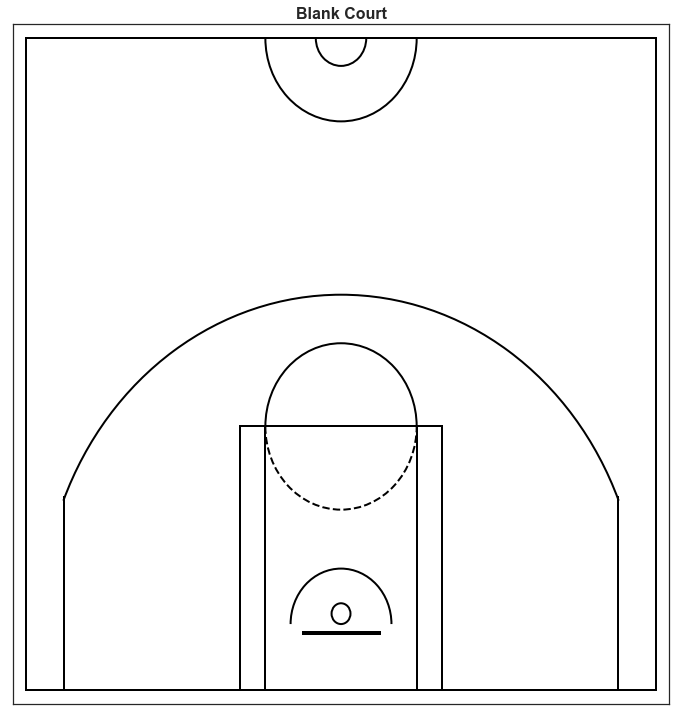

In [285]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True, analysis_lines=False)
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.xticks([])
plt.yticks([])
plt.title("Blank Court", fontsize = 16, fontweight='bold')
plt.show()

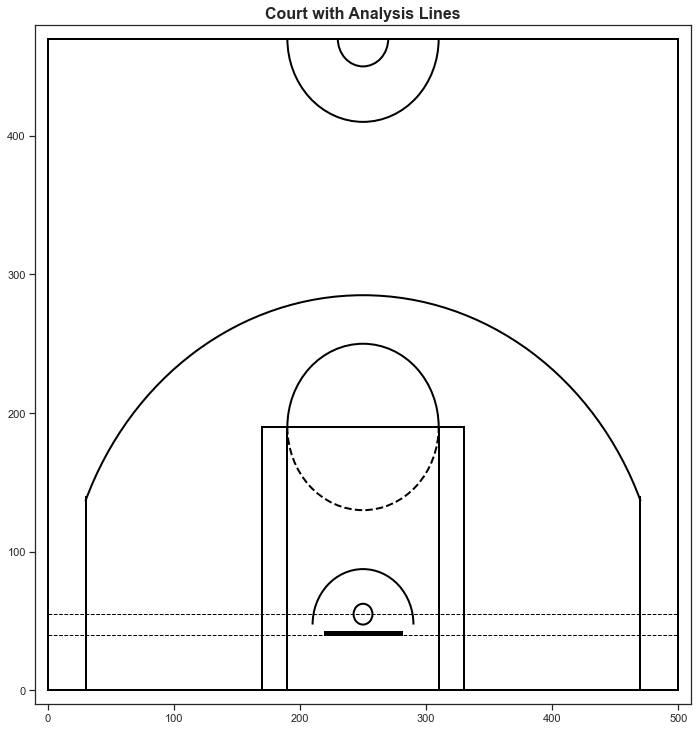

In [286]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True, analysis_lines=True)
plt.xlim(-10,510)
plt.ylim(-10,480)

plt.title("Court with Analysis Lines", fontsize = 16, fontweight='bold')
plt.show()

## Plotting our shot log data

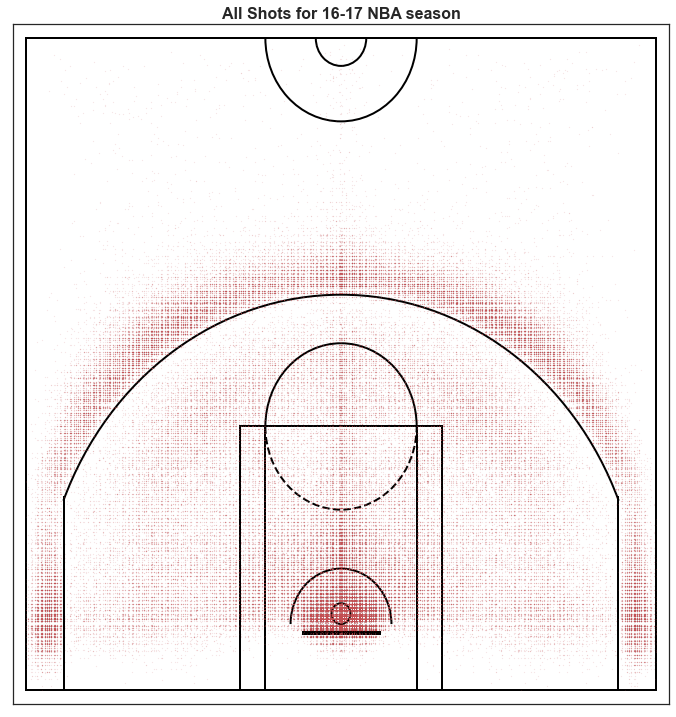

In [287]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)
plt.scatter(shot['halfcourt_x'],shot['halfcourt_y'], s=.01,c='r', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("All Shots for 16-17 NBA season", fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

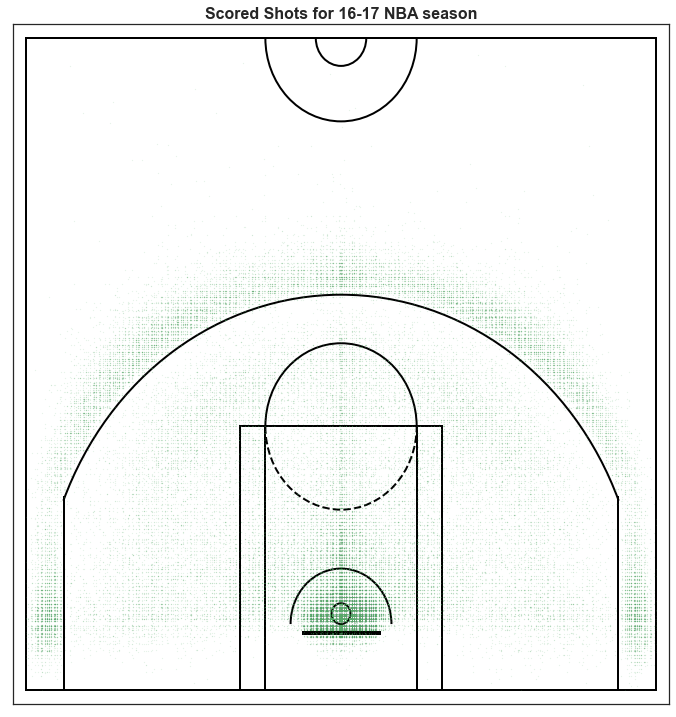

In [288]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Scored = shot[shot.current_shot_outcome == 'SCORED']
plt.scatter(Scored['halfcourt_x'],Scored['halfcourt_y'], s=.01,c='g', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Scored Shots for 16-17 NBA season",  fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

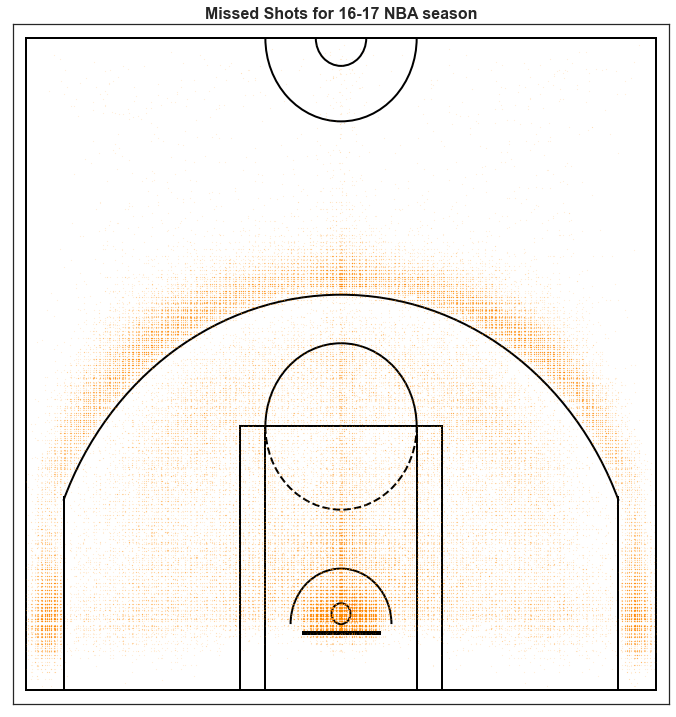

In [289]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Missed = shot[shot.current_shot_outcome == 'MISSED']
plt.scatter(Missed['halfcourt_x'],Missed['halfcourt_y'], s=.01,c='darkorange', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Missed Shots for 16-17 NBA season",  fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

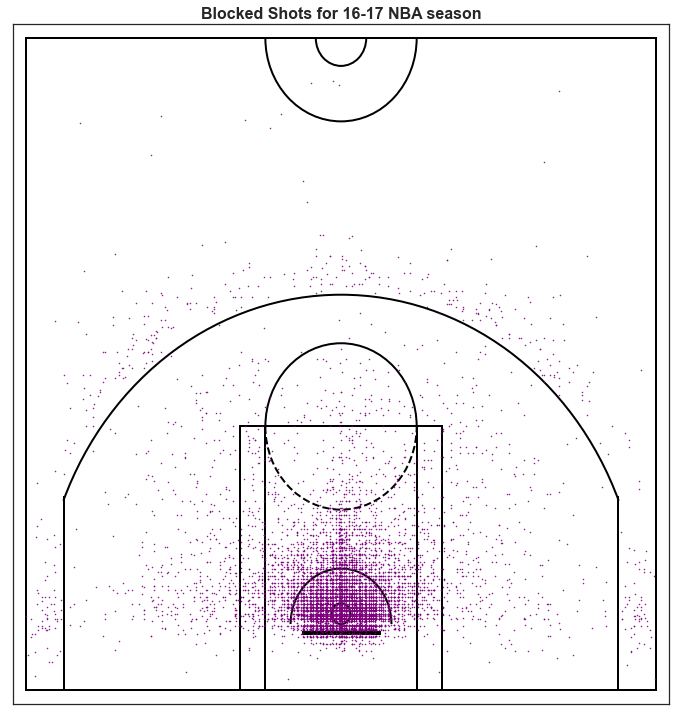

In [290]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']
plt.scatter(Blocked['halfcourt_x'], Blocked['halfcourt_y'], s=1, c='purple', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Blocked Shots for 16-17 NBA season",  fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

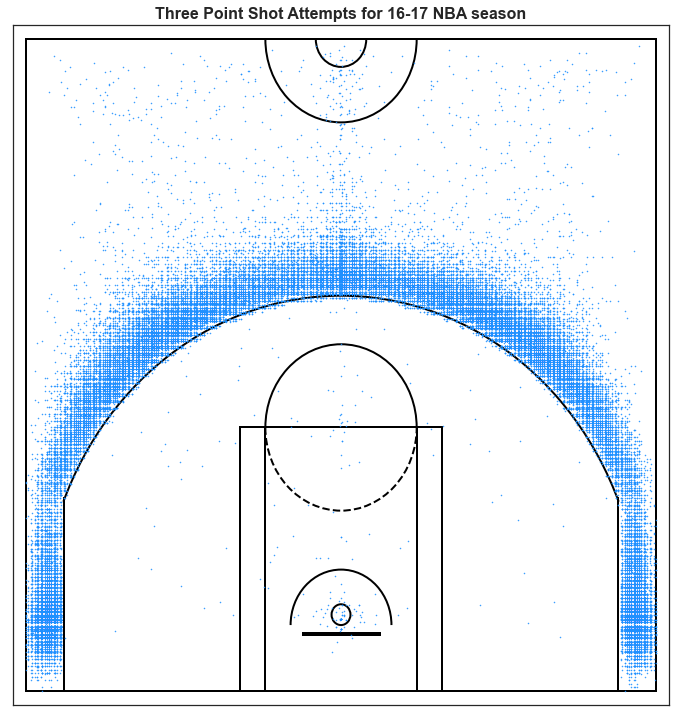

In [291]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Threes = shot[shot['points']==3]
plt.scatter(Threes['halfcourt_x'], Threes['halfcourt_y'], s=1, c='dodgerblue', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Three Point Shot Attempts for 16-17 NBA season", fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

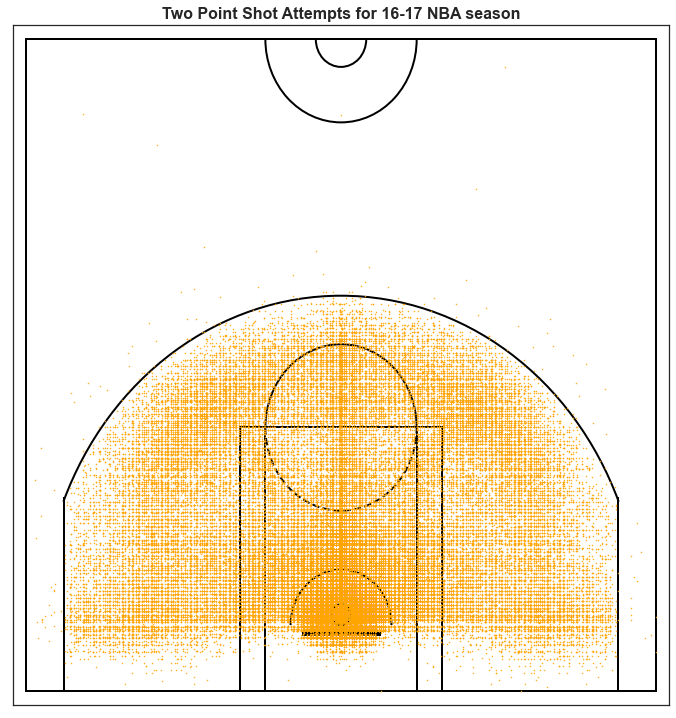

In [292]:
n=4
plt.figure(figsize=(94/(2*n),50/n))
draw_court(outer_lines=True)

Twos = shot[shot['points']==2]
plt.scatter(Twos['halfcourt_x'], Twos['halfcourt_y'], s=1, c='orange', marker= '.')
plt.xlim(-10,510)
plt.ylim(-10,480)
plt.title("Two Point Shot Attempts for 16-17 NBA season", fontsize = 16, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.show()

## Comparing Players

In [293]:
def get_player_df(name):
    return shot[shot['shoot_player']==name]

def get_player_scored(name):
    return get_player_df(name)[get_player_df(name).current_shot_outcome =='SCORED']
    
def get_player_missed(name):
    return get_player_df(name)[get_player_df(name).current_shot_outcome =='MISSED']

In [294]:
df_KLove = get_player_df('Kevin Love')
df_KLove

self_previous_shot player_position home_game  location_x  \
35022                NaN              PF       Yes        87.0   
35025             MISSED              PF       Yes       215.0   
35027             SCORED              PF       Yes       200.0   
35035             MISSED              PF       Yes        45.0   
35046             MISSED              PF       Yes        70.0   
...                  ...             ...       ...         ...   
41884             SCORED              PF        No       234.0   
41896             MISSED              PF        No        62.0   
41897             MISSED              PF        No        59.0   
41904             SCORED              PF        No        62.0   
41905             SCORED              PF        No        62.0   

      opponent_previous_shot home_team             shot_type  points  \
35022                 SCORED       CLE             Hook Shot       2   
35025                 MISSED       CLE             Jump Shot       3   
35027                 MISSED       CLE             Jump Shot       2   
35035                 SCORED       CLE         Driving Layup       2   
35046                 MISSED       CLE                 Layup       2   
...                      ...       ...                   ...     ...   
41884                 SCORED       MIA             Jump Shot       3   
41896                 MISSED       MIA       Alley Oop Layup       2   
41897                 MISSED       MIA        Tip Layup Shot       2   
41904                 SCORED       MIA             Jump Shot       3   
41905                 MISSED       MIA  Turnaround Jump Shot       3   

      away_team  location_y   time        date shoot_player  \
35022       NYK       239.0   0:34  10/25/2016   Kevin Love   
35025       NYK        59.0   1:39  10/25/2016   Kevin Love   
35027       NYK       380.0   2:27  10/25/2016   Kevin Love   
35035       NYK       264.0   5:12  10/25/2016   Kevin Love   
35046       NYK       238.0   9:17  10/25/2016   Kevin Love   
...         ...         ...    ...         ...          ...   
41884       CLE        95.0   3:04   4/10/2017   Kevin Love   
41896       CLE       244.0  10:18   4/10/2017   Kevin Love   
41897       CLE       252.0  10:20   4/10/2017   Kevin Love   
41904       CLE        17.0   2:35   4/10/2017   Kevin Love   
41905       CLE        20.0   3:22   4/10/2017   Kevin Love   

       time_from_last_shot  quarter current_shot_outcome  halfcourt_y  \
35022                  NaN        1               MISSED         87.0   
35025                 25.0        1               MISSED        215.0   
35027                 26.0        1               MISSED        200.0   
35035                  4.0        1               SCORED         45.0   
35046                 21.0        1               MISSED         70.0   
...                    ...      ...                  ...          ...   
41884                 45.0        4               MISSED        234.0   
41896                 21.0        4               MISSED         62.0   
41897                  2.0        4               SCORED         59.0   
41904                 30.0        5               SCORED         62.0   
41905                 47.0        5               MISSED         62.0   

       halfcourt_x  
35022        239.0  
35025         59.0  
35027        380.0  
35035        264.0  
35046        238.0  
...            ...  
41884         95.0  
41896        244.0  
41897        252.0  
41904         17.0  
41905         20.0  

[867 rows x 18 columns]

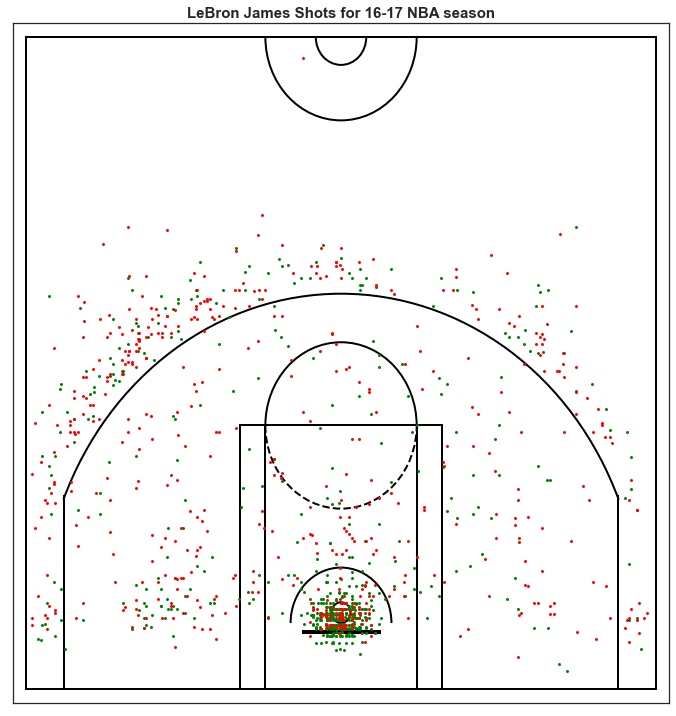

In [295]:
def plot_player_shots(name):
    n=4
    plt.figure(figsize=(94/(2*n),50/n))
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
    df_player_makes = get_player_scored(name)
    df_player_misses = get_player_missed(name)
    plt.scatter(df_player_makes['halfcourt_x'], df_player_makes['halfcourt_y'], s=15,c='green', marker= '.')
    plt.scatter(df_player_misses['halfcourt_x'], df_player_misses['halfcourt_y'], s=15,c='red', marker= '.')
    plt.title(f"{name} Shots for 16-17 NBA season", fontsize = 15, fontweight='bold')
    plt.show()
    
plot_player_shots('LeBron James')

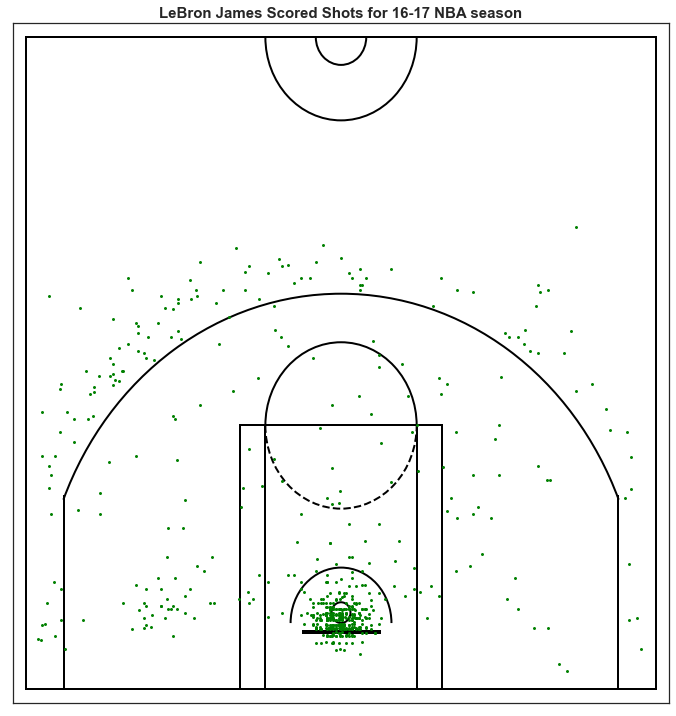

In [296]:
def plot_player_makes(name):
    n=4
    plt.figure(figsize=(94/(2*n),50/n))
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
    df_player = get_player_scored(name)
    plt.scatter(df_player['halfcourt_x'], df_player['halfcourt_y'], s=15,c='green', marker= '.')
    plt.title(f"{name} Scored Shots for 16-17 NBA season", fontsize = 15, fontweight='bold')
    plt.show()
    
plot_player_makes('LeBron James')

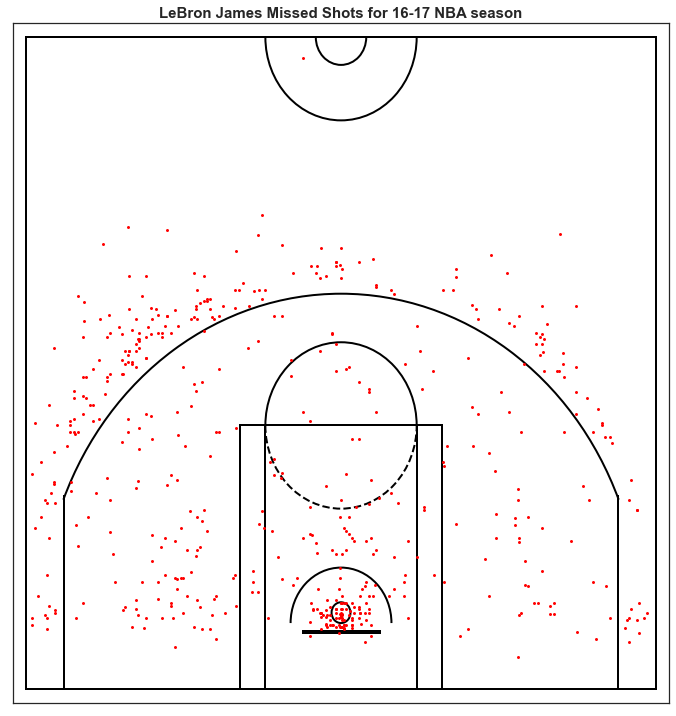

In [297]:
def plot_player_misses(name):
    n=4
    plt.figure(figsize=(94/(2*n),50/n))
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
    df_player = get_player_missed(name)
    plt.scatter(df_player['halfcourt_x'], df_player['halfcourt_y'], s=15,c='red', marker= '.')
    plt.title(f"{name} Missed Shots for 16-17 NBA season", fontsize = 15, fontweight='bold')
    plt.show()
    
plot_player_misses('LeBron James')

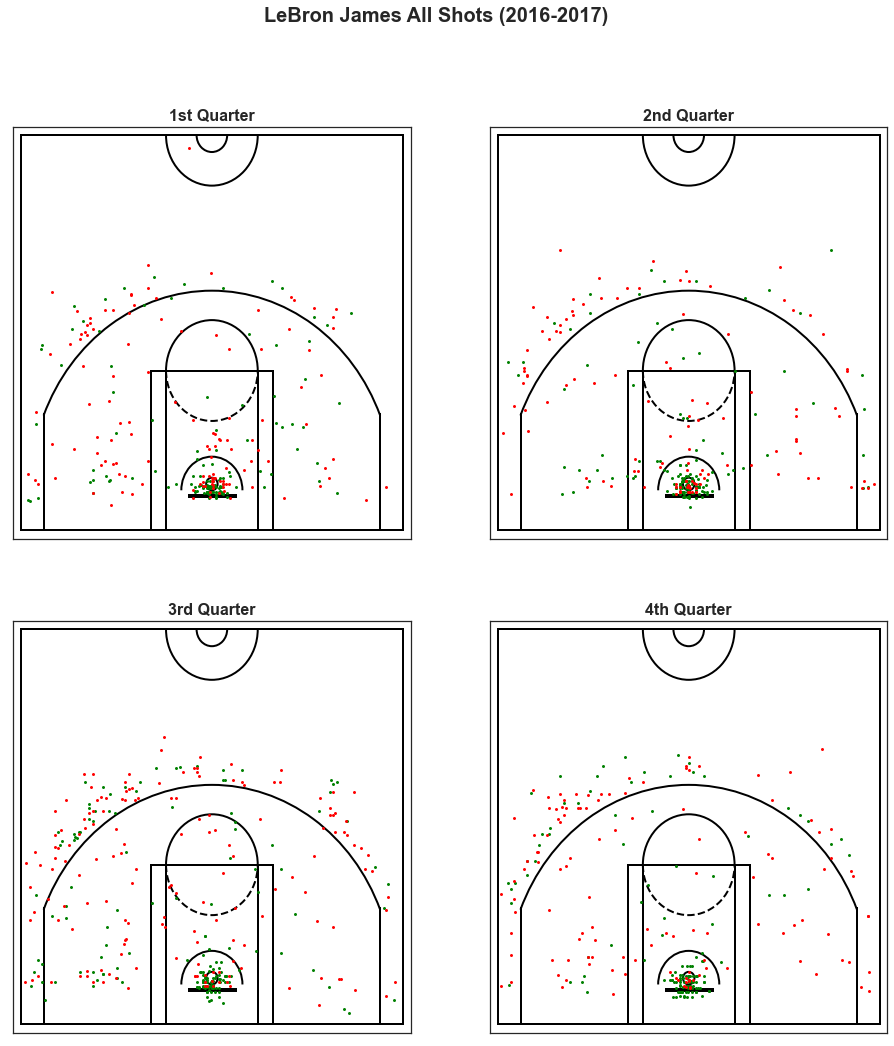

In [298]:
def player_shots_by_quarter(name, makes=True, misses=True):
    
    n=3
    
    df_player_makes = get_player_scored(name)
    df_player_makes_q1 = df_player_makes[df_player_makes.quarter==1]
    df_player_makes_q2 = df_player_makes[df_player_makes.quarter==2]
    df_player_makes_q3 = df_player_makes[df_player_makes.quarter==3]
    df_player_makes_q4 = df_player_makes[df_player_makes.quarter==4]
        
    df_player_misses = get_player_missed(name)
    df_player_misses_q1 = df_player_misses[df_player_misses.quarter==1]
    df_player_misses_q2 = df_player_misses[df_player_misses.quarter==2]
    df_player_misses_q3 = df_player_misses[df_player_misses.quarter==3]
    df_player_misses_q4 = df_player_misses[df_player_misses.quarter==4]
    
    f = plt.figure(figsize=(94/(2*n),50/n))
    f.suptitle(f'{name} All Shots (2016-2017)', fontsize=20, fontweight='bold')
        
    ax1 = f.add_subplot(221)
    ax1.set_title('1st Quarter', fontsize=16, fontweight='bold')
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
        
    ax2 = f.add_subplot(222)
    ax2.set_title('2nd Quarter', fontsize=16, fontweight='bold')
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
        
    ax3 = f.add_subplot(223)
    ax3.set_title('3rd Quarter', fontsize=16, fontweight='bold')
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
        
    ax4 = f.add_subplot(224)
    ax4.set_title('4th Quarter', fontsize=16, fontweight='bold')
    draw_court(outer_lines=True)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    plt.xticks([])
    plt.yticks([])
        
    if makes and misses:
        ax1.scatter(df_player_makes_q1['halfcourt_x'],df_player_makes_q1['halfcourt_y'], s=15,c='green', marker= '.')
        ax1.scatter(df_player_misses_q1['halfcourt_x'],df_player_misses_q1['halfcourt_y'], s=15,c='red', marker= '.')
        
        ax2.scatter(df_player_makes_q2['halfcourt_x'],df_player_makes_q2['halfcourt_y'], s=15,c='green', marker= '.')
        ax2.scatter(df_player_misses_q2['halfcourt_x'],df_player_misses_q2['halfcourt_y'], s=15,c='red', marker= '.')
        
        ax3.scatter(df_player_makes_q3['halfcourt_x'],df_player_makes_q3['halfcourt_y'], s=15,c='green', marker= '.')
        ax3.scatter(df_player_misses_q3['halfcourt_x'],df_player_misses_q3['halfcourt_y'], s=15,c='red', marker= '.')
        
        ax4.scatter(df_player_makes_q4['halfcourt_x'],df_player_makes_q4['halfcourt_y'], s=15,c='green', marker= '.')
        ax4.scatter(df_player_misses_q4['halfcourt_x'],df_player_misses_q4['halfcourt_y'], s=15,c='red', marker= '.')
        
    elif makes:
        ax1.scatter(df_player_makes_q1['halfcourt_x'],df_player_makes_q1['halfcourt_y'], s=15,c='green', marker= '.')
        ax2.scatter(df_player_makes_q2['halfcourt_x'],df_player_makes_q2['halfcourt_y'], s=15,c='green', marker= '.')
        ax3.scatter(df_player_makes_q3['halfcourt_x'],df_player_makes_q3['halfcourt_y'], s=15,c='green', marker= '.')
        ax4.scatter(df_player_makes_q4['halfcourt_x'],df_player_makes_q4['halfcourt_y'], s=15,c='green', marker= '.')
        
    elif misses:
        ax1.scatter(df_player_misses_q1['halfcourt_x'],df_player_misses_q1['halfcourt_y'], s=15,c='red', marker= '.')
        ax2.scatter(df_player_misses_q2['halfcourt_x'],df_player_misses_q2['halfcourt_y'], s=15,c='red', marker= '.')
        ax3.scatter(df_player_misses_q3['halfcourt_x'],df_player_misses_q3['halfcourt_y'], s=15,c='red', marker= '.')
        ax4.scatter(df_player_makes_q4['halfcourt_x'],df_player_makes_q4['halfcourt_y'], s=15,c='green', marker= '.')
        
    plt.show()
    
player_shots_by_quarter('LeBron James', makes=True, misses=True)

## Function to plot all shots comparison between any two players

In [299]:
def compare_shots(player1, player2):
    n=5
    f = plt.figure(figsize=(94/n,50/n))
    
    Player1 = shot[shot['shoot_player']==player1]
    hxP1 = Player1['halfcourt_x']
    hyP1 = Player1['halfcourt_y']
    
    ax = f.add_subplot(121)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    draw_court(outer_lines=True)
    colors = np.where(Player1['current_shot_outcome']=='SCORED','g',np.where(Player1['current_shot_outcome']=='MISSED','r','purple'))
    ax = plt.scatter(hxP1,hyP1, s=10, c= colors, marker= '.')
    plt.title(player1, fontsize = 18, fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    
    Player2 = shot[shot['shoot_player']==player2]
    hxP2 = Player2['halfcourt_x']
    hyP2 = Player2['halfcourt_y']

    ax = f.add_subplot(122)
    plt.xlim(-10,510)
    plt.ylim(-10,480)
    draw_court(outer_lines=True)
    colors = np.where(Player2['current_shot_outcome']=='SCORED','g',np.where(Player2['current_shot_outcome']=='MISSED','r','purple'))
    ax = plt.scatter(hxP2,hyP2, s=10, c= colors, marker= '.')
    plt.title(player2, fontsize = 18, fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

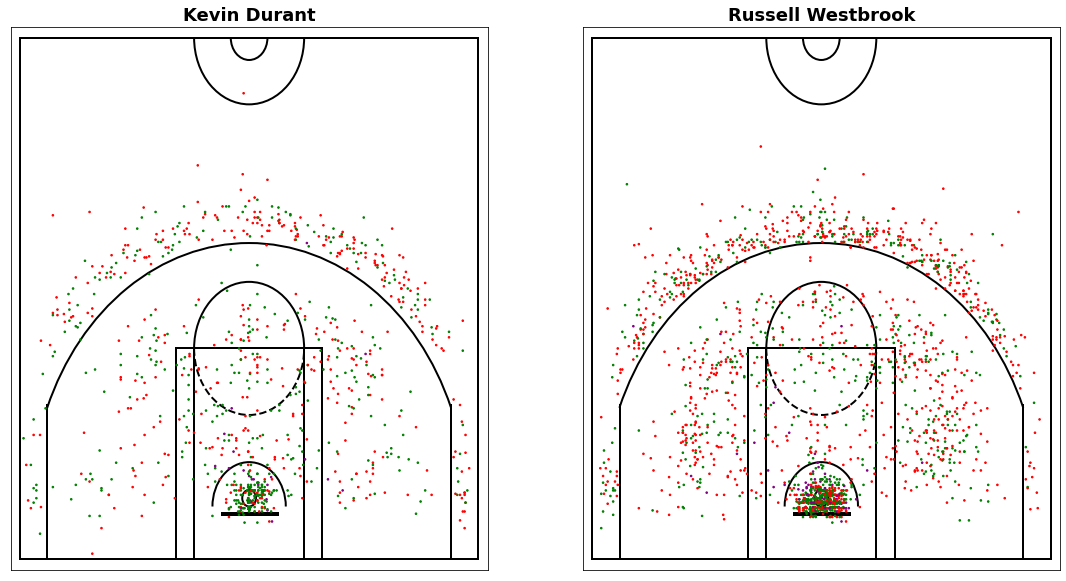

In [249]:
compare_shots("Kevin Durant", "Russell Westbrook")

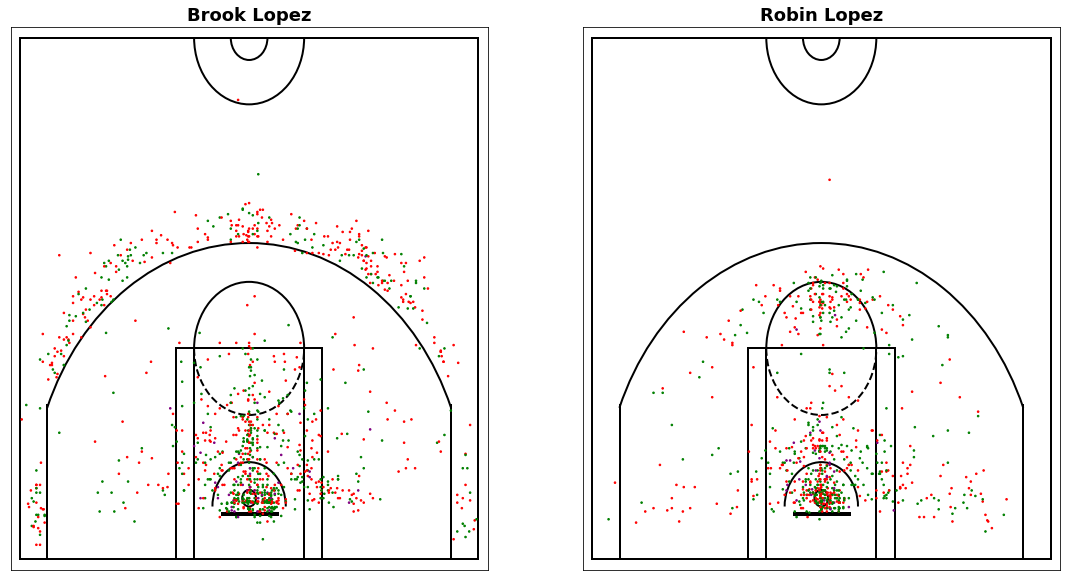

In [250]:
compare_shots("Brook Lopez", "Robin Lopez")

## Create Seaborne joint plots for our data

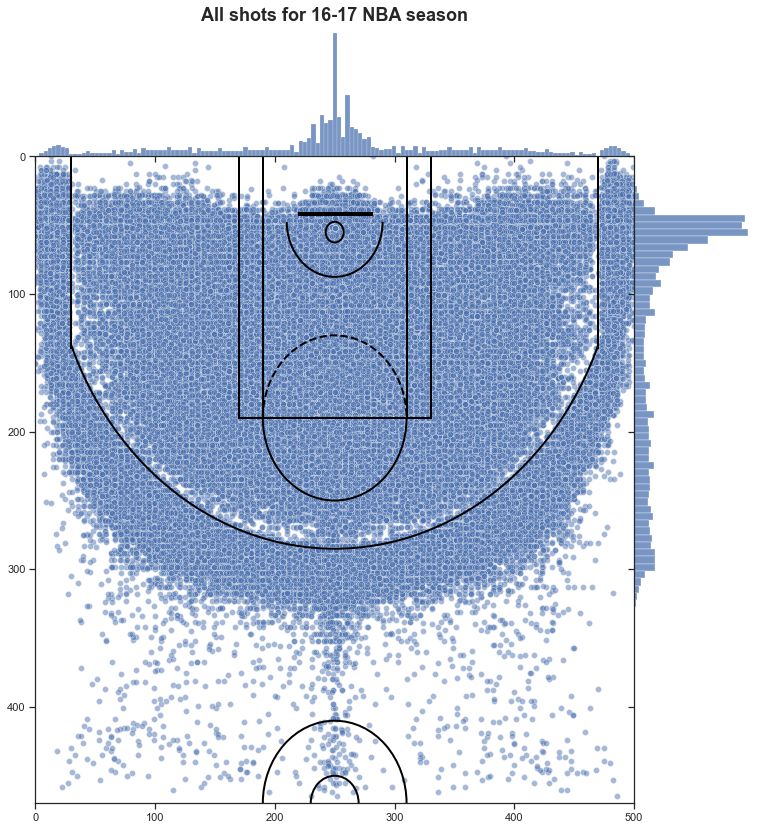

In [300]:
joint_shot_chart = sns.jointplot(x=shot['halfcourt_x'], y=shot['halfcourt_y'],
                                 kind='scatter', space=0, alpha=0.5)


n=4
joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

ax = joint_shot_chart.ax_joint
draw_court(ax)

ax.set_xlim(0,500)
ax.set_ylim(470, 0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title('All shots for 16-17 NBA season', y=1.2, fontsize=18, fontweight='bold')

plt.show()

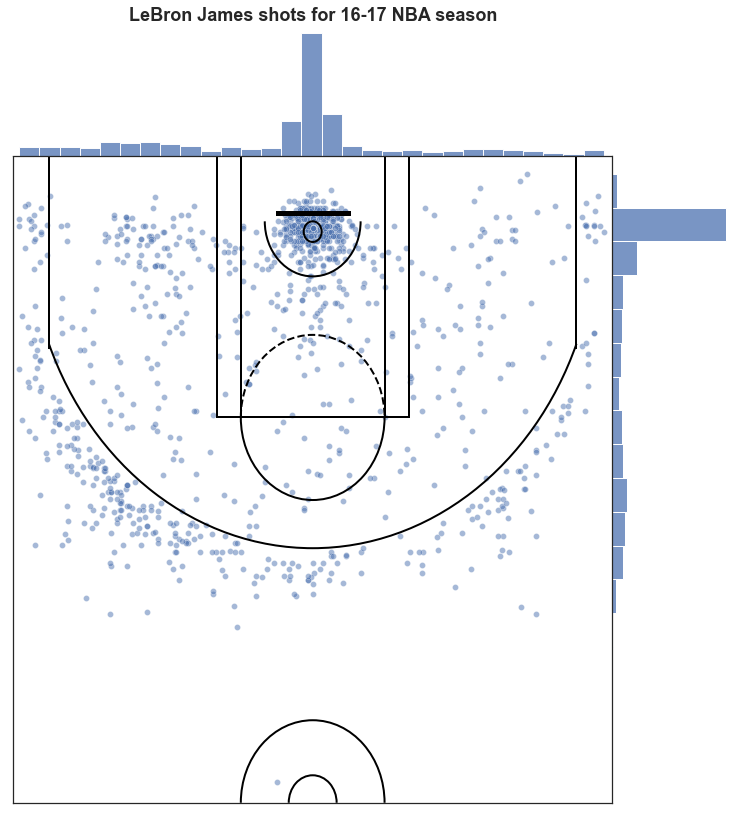

In [301]:
def player_jointplot(name):
    joint_shot_chart = sns.jointplot(x=get_player_df(name)['halfcourt_x'],
                                     y=get_player_df(name)['halfcourt_y'],
                                     kind='scatter', space=0, alpha=0.5)

    n=4
    joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

    ax = joint_shot_chart.ax_joint
    draw_court(ax)

    ax.set_xlim(0,500)
    ax.set_ylim(470, 0)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')

    ax.set_title(f'{name} shots for 16-17 NBA season', y=1.2, fontsize=18, fontweight='bold')

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    
player_jointplot('LeBron James')

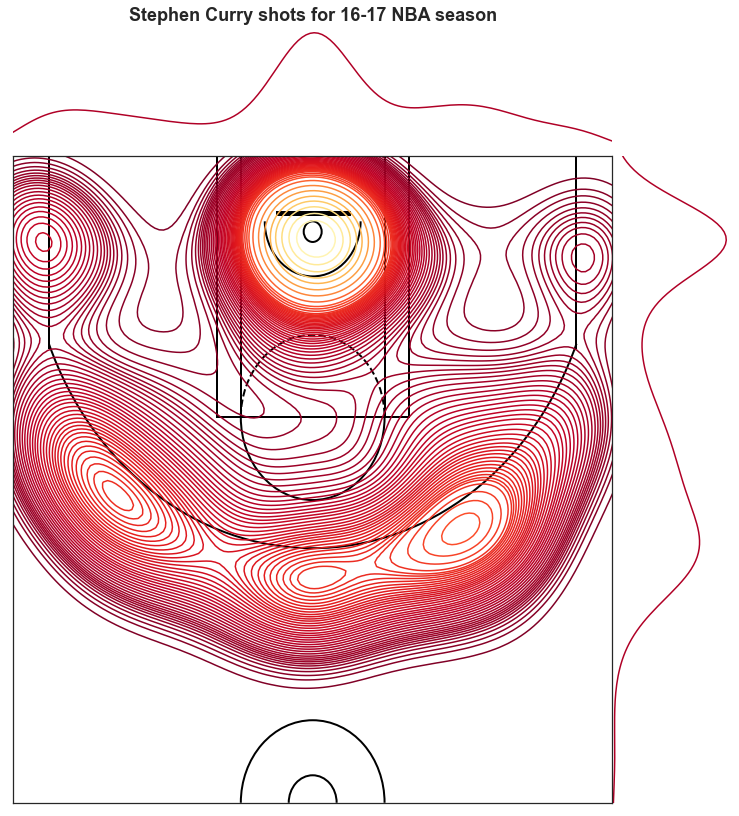

In [302]:
def player_kde_plots(name):

    cmap=plt.cm.YlOrRd_r 

    joint_shot_chart = sns.jointplot(x=get_player_df(name)['halfcourt_x'], 
                                     y=get_player_df(name)['halfcourt_y'],
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

    n=4
    joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

    ax = joint_shot_chart.ax_joint
    draw_court(ax)

    ax.set_xlim(0,500)
    ax.set_ylim(470, 0)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')

    ax.set_title(f'{name} shots for 16-17 NBA season', 
                 y=1.2, fontsize=18, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

player_kde_plots('Stephen Curry')

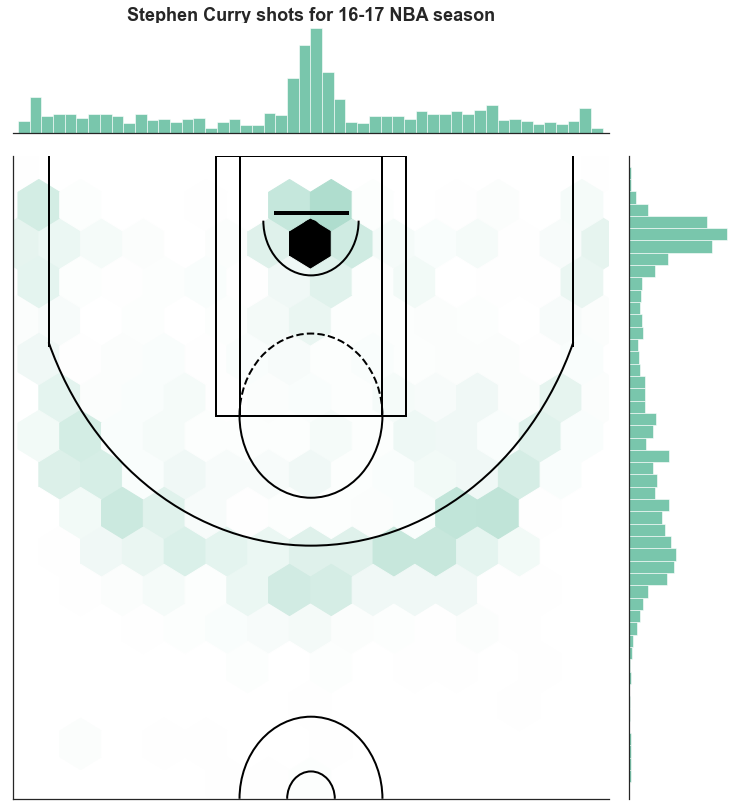

In [303]:
def player_hex_plot(name):
    sns.set_theme(style="ticks")
    cmap=plt.cm.YlOrRd_r 
    joint_shot_chart = sns.jointplot(x=get_player_df(name)['halfcourt_x'], y=get_player_df(name)['halfcourt_y'],
                                 kind='hex',color="#4CB391", marginal_kws=dict(bins=50, fill=True))

    n=4
    joint_shot_chart.fig.set_size_inches(94/(2*n),50/n)

    ax = joint_shot_chart.ax_joint
    draw_court(ax)

    ax.set_xlim(0,500)
    ax.set_ylim(470, 0)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')

    ax.set_title(f'{name} shots for 16-17 NBA season', 
             y=1.2, fontsize=18, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    
player_hex_plot('Stephen Curry')